<a href="https://colab.research.google.com/github/G-Sa/Data-Science/blob/master/Analisando_os_Dados_do_Airbnb_Cape_Town_%C3%81frica_do_Sul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

C<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Cape Town, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

In [39]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [40]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/south-africa/wc/cape-town/2020-06-21/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* `id` Identificador único do imóvel
* `name` Nome do imóvel anunciado
* `host_id` Identificador único do proprietário
* `neighbourhood_group` Coluna sem valores válidos
* `neighbourhood` Nome do Bairro onde o imóvel está localizado
* `latitude` Coordenada geográfica Latitude
* `longitude` Coordenada Geográfica Longitude
* `room_type` Tipo do imóvel para aluguel 
    * `Entire home/apt` Toda a casa/apartamento
    * `Private room` Quarto Privativo
* `price` Preço do aluguel
* `minimum_nights` Quantidade mínima de noites que podem ser alugadas
* `number_of_reviews` Número de avaliações feitas por usuários sobre o imóvel
* `last_review` Data da última avaliação feita
* `reviews_per_month` Número de avaliações por mês 
* `calculated_host_listings_count` Número de imóveis do mesmo proprietário
* `avaliability_365` Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [41]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,Entire home/apt,815,3,54,2020-03-07,0.63,1,365
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,2038,2,27,2019-08-18,0.34,4,0
2,15068,Grande Bay,59318,Linda,NaN,Ward 23,-33.78799,18.46082,Entire home/apt,2793,4,0,NaN,NaN,10,365
3,15077,Top relaxed beach living in style,59342,Georg,NaN,Ward 4,-33.85812,18.49043,Private room,1648,5,5,2016-12-10,0.06,5,234
4,15180,The Melkbaai - Beachfront,59663,Heinri,NaN,Ward 83,-34.11124,18.82349,Entire home/apt,587,2,0,NaN,NaN,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para fazer uma análise apropriada dos dados, mesmo que superficial, é importante saber com quais tipos de dados e a quantidade de dados disponíveis.

In [42]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 24062
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Para saber a qualidade de um dataset, uma das informações cruciais é a quantidade de valores ausentes. Sabendo disto é possivel tomar decisões sobre a confiabilidade das analises realizadas.

  * `neighbourhood_group` tem 100% dos valores nulos, como já sabiamos anteriormente.
  * `reviews_per_month`e `las_review` tem pouco mais de um quarto dos valores nulos
  * `host_name` tem menos de 0,001% de valores nulos

In [43]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.286053
last_review                       0.286053
host_name                         0.000083
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Agora que conhecemos sobre os tipos de variaveis e quais as porcentagens de valores são nulos, é importante conhecer a distribuição dos dados


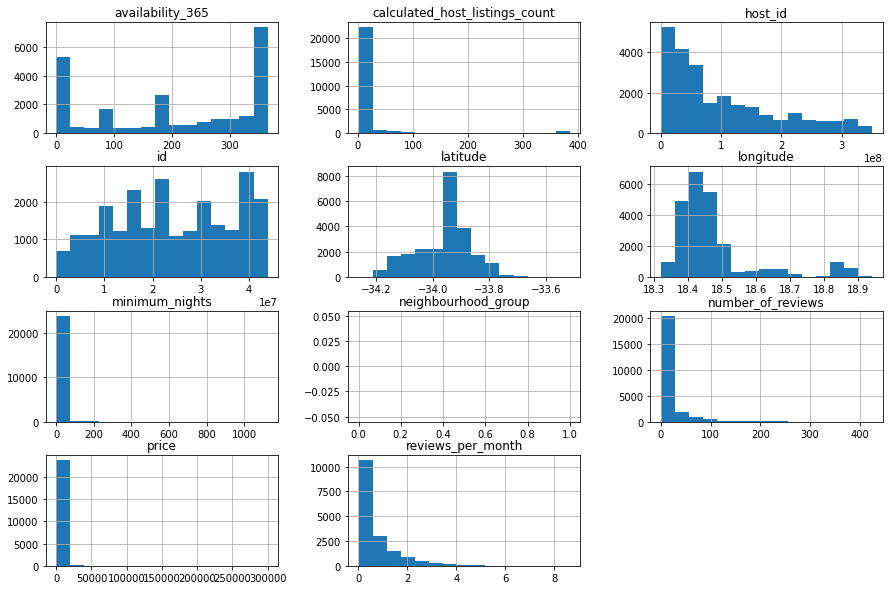

In [44]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [45]:
# ver a média da coluna `price``

df['price'].describe()

count     24062.000000
mean       2469.964217
std        7527.481974
min           0.000000
25%         659.000000
50%        1058.000000
75%        2003.000000
max      300009.000000
Name: price, dtype: float64

Como podemos ver no resumo acima, a média de preços de aluguel é de R2469, porém também podemos notar que este valor está sendo manipulado
  * `75%` dos preços de aluguel são até R2000
  * `max` é um valor de R300009. 15 vezes o valor da maior parte dos dados

Uma outra forma de visualizar esses dados é através do gráfico

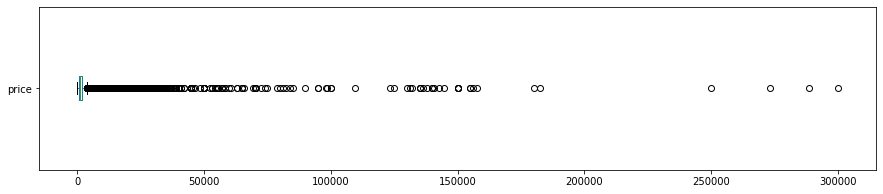

Preços de alugue: Acima de 5000:
2011 ocorrências
8.3576%


In [46]:
#boxplot de preços de aluguel
df.price.plot(kind ='box', vert = False, figsize = (15,3))
plt.show()

#quantidade de valores acima de R5000
print("Preços de alugue: Acima de 5000:")
print("{} ocorrências".format((len(df[df.price > 5000]))))
print("{:.4f}%".format((len(df[df.price > 5000]) / df.shape[0])*100))

Agora que conhecemos os outlyers nós podemos visualizar o dataframe de `price`de uma menira mais limpa e organizada

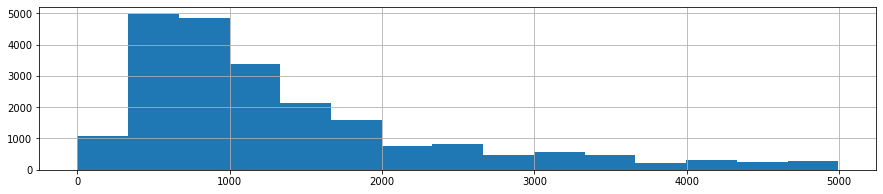

In [47]:
#criar um novo dataframe sem os outlyers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 5000].index, axis = 0,inplace = True)

df_clean.price.hist(bins = 15, figsize = (15,3))

### **Q4. Qual a correlação existente entre as variáveis**

Uma correlação é a taxa no qual uma variavel influencia nas outras. Ou seja, qual a semelhança de contexto que elas têm entre sí.

Uma forma de medir esta correlação é através do coeficiente de correlação

In [48]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.025488,-0.085157,-0.125483,-0.018889,-0.008651
minimum_nights,0.025488,1.000000,-0.026050,-0.024047,-0.027083,-0.012002
number_of_reviews,-0.085157,-0.026050,1.000000,0.774319,-0.047280,0.063267
reviews_per_month,-0.125483,-0.024047,0.774319,1.000000,-0.012258,0.055483
calculated_host_listings_count,-0.018889,-0.027083,-0.047280,-0.012258,1.000000,0.041611
availability_365,-0.008651,-0.012002,0.063267,0.055483,0.041611,1.000000


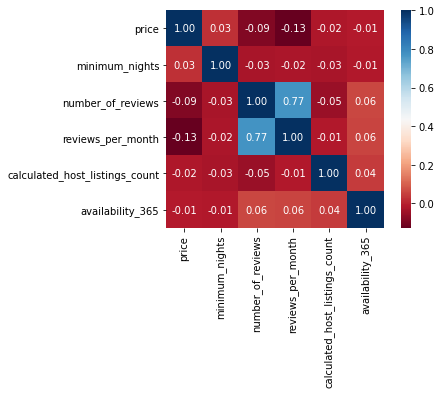

In [49]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Também é interessante saber qual o tipo de imóvel mais alugado.
No Airbnb essa informação está armazenada na coluna `room_type`, então podemos visualizar mais facilmente da seguinte maneira

In [50]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    16381
Private room        5160
Hotel room           372
Shared room          138
Name: room_type, dtype: int64

In [51]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0])*100
´

Entire home/apt    74.286880
Private room       23.400299
Hotel room          1.686998
Shared room         0.625822
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Para econtrar a informação de localidade mais cara, é necessário realizar um cruzamento de dados, entre os valores das colunas `price` e `neighbourhood`




In [52]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)


neighbourhood
Ward 52    4493.000000
Ward 40    4007.000000
Ward 78    3001.000000
Ward 69    1875.828194
Ward 54    1803.799745
              ...     
Ward 99     347.000000
Ward 12     343.400000
Ward 93     306.333333
Ward 98     294.000000
Ward 30     277.500000
Name: price, Length: 97, dtype: float64

Podemos realizar uma rapida comparação entre os bairros _Ward 52_ e _Ward 30_, que são respectivamente o maior e menor preço médio.

In [53]:
# verificar quantidade de imóveis em Ward 52
print("Ward 52")
print(df_clean[df_clean.neighbourhood == "Ward 52"].shape)

# visualizar todas as entradas de Ward 52

df_clean[df_clean.neighbourhood == "Ward 52"]



Ward 52
(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19359,38230128,spacious,54171197,Neil,NaN,Ward 52,-33.95007,18.5278,Entire home/apt,4493,10,0,NaN,NaN,3,52


In [54]:
# verificar quantidade de imóveis em Ward 30
print("Ward 30")
print(df_clean[df_clean.neighbourhood == "Ward 30"].shape)

# visualizar todas as entradas de Ward 30

df_clean[df_clean.neighbourhood == "Ward 30"]

Ward 30
(2, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13154,25712259,AT HOME WITH INDEPENDANCE - Room 5,181792428,Aziza,NaN,Ward 30,-33.91503,18.54614,Private room,208,1,0,NaN,NaN,3,173
21170,40228746,Juli-Mare Guest House,305097680,Cecilia,NaN,Ward 30,-33.92403,18.55711,Entire home/apt,347,1,0,NaN,NaN,1,171


Estes dois bairros, por serem os de situação mais extrema, apresentam poucos imóveis. Logo percebe-se que uma tomada de decisão e análise precisa passar por mais validações.

In [55]:
# Visualizar quais bairros possuem mais imóveis
df_clean.groupby(['neighbourhood']).neighbourhood.count()


neighbourhood
Ward 1      224
Ward 10      32
Ward 100    379
Ward 101      1
Ward 102     63
           ... 
Ward 93       3
Ward 94       8
Ward 96       2
Ward 98       1
Ward 99       1
Name: neighbourhood, Length: 97, dtype: int64

Além da visualização por bairro, também é possivel visualizar através de geolocalização, pois a tabela possui as colunas `latitude` e `longitude`

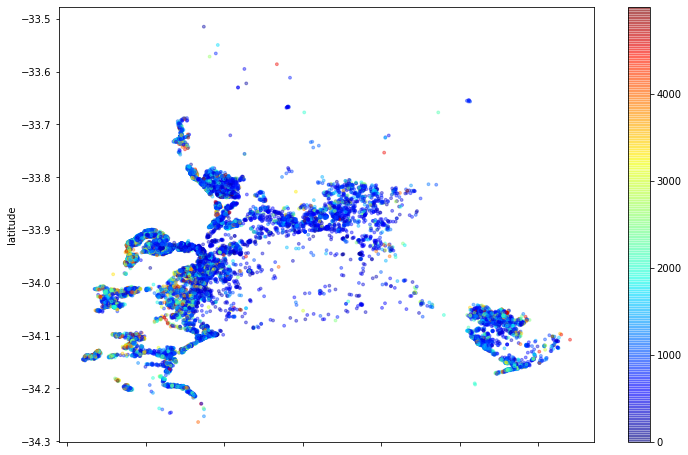

In [56]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind = "scatter", x = "longitude", y = "latitude" , alpha = 0.4, c=df_clean['price'], s = 8,
              cmap = plt.get_cmap('jet'), figsize = (12,8))


Munidos dessas novas visualizações e comparações, é possivel perceber a distribuição dos preços através dos bairros de uma maneira mais clara e justa.


## Conclusões

Nessa análise foi utilizado o dataset resumido dos dados do Airbnb, porém já foi possível identificar outlyers e iniciar o processo de entendimento da distribuição dos dados, incluindo correlações e distribuição de informações.